In [32]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, SimpleRNN, GRU, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt

In [35]:
vocab_size = 20000

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
print(len(X_train), "train sequences")
print(len(X_test), "test sequences")
print(np.max(y_train)+1, "classes")

25000 train sequences
25000 test sequences
2 classes


In [ ]:
print(x_train[0][:50])

In [3]:
num_pad = 80  
X_train = pad_sequences(X_train, maxlen=num_pad)
X_test =  pad_sequences(X_test, maxlen=num_pad)
print("x_train shape:", X_train.shape)
print("x_test shape:", X_test.shape)

x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [4]:
num_embeddings = 128    # 임베딩 벡터의 차원
dropout_ratio = 0.3    # 드롭아웃 비율
num_filters = 32       # 커널의 수
kernel_size = 2        # 커널의 크기
hidden_units = 32     # 뉴런의 수

In [5]:
dnn_model = Sequential([
    Embedding(vocab_size, num_embeddings ),
    GlobalMaxPooling1D(),
    Dense(hidden_units),
    Dense(1, activation='sigmoid')
])

In [8]:
rnn_model = Sequential([
    Embedding(vocab_size, num_embeddings ),
    SimpleRNN(hidden_units),
    Dense(1, activation='sigmoid')
])

In [11]:
lstm_model = Sequential([
    Embedding(vocab_size, num_embeddings ),
    LSTM(hidden_units),
    Dense(1, activation='sigmoid')
])

In [12]:
gru_model = Sequential([
    Embedding(vocab_size, num_embeddings ),
    LSTM(hidden_units),
    Dense(1, activation='sigmoid')
])

In [14]:
cnn_model = Sequential([ 
    Embedding(vocab_size, num_embeddings),
    Conv1D(num_filters, kernel_size, padding='valid', activation='relu'),
    GlobalMaxPooling1D(),
    Dense(hidden_units, activation='relu'),
    Dropout(dropout_ratio),
    Dense(1, activation='sigmoid')
])

In [15]:
models = {'DNN': dnn_model,
          'SimpleRNN': rnn_model,
          'LSTM': lstm_model,
          'GRU': gru_model,
          'CNN1D': cnn_model}

In [16]:
results = []
histories =[]
model_name=[]
for name, model in models.items():
    print(f'Traing {name} model ...')
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)
    histories.append(history)
    results.append(model.evaluate(X_test, y_test))
    model_name.append(name)
    print(name, '테스트 정확도:', results[-1][1])


Traing DNN model ...
Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - acc: 0.6816 - loss: 0.6042 - val_acc: 0.8382 - val_loss: 0.3742
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - acc: 0.8881 - loss: 0.2767 - val_acc: 0.8390 - val_loss: 0.3619
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - acc: 0.9552 - loss: 0.1375 - val_acc: 0.8322 - val_loss: 0.4118
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - acc: 0.9908 - loss: 0.0453 - val_acc: 0.8308 - val_loss: 0.4787
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - acc: 0.9995 - loss: 0.0097 - val_acc: 0.8316 - val_loss: 0.5304
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - acc: 1.0000 - loss: 0.0028 - val_acc: 0.8326 - val_loss: 0.5700
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - acc: 1.0000 - loss: 0.0014 - val_acc: 0.8324 - val_loss: 0.5955
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - acc: 1.0000 - loss: 8.8430e-04 - val_acc: 0.8330 - val_loss: 0.6175
Epoch 9/15
313/313 ━━━━

In [17]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
history = model.fit(X_train, y_train, batch_size=16, epochs=15, validation_split=0.2)

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 0.9928 - loss: 0.0200 - val_accuracy: 0.8182 - val_loss: 0.7130
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.9929 - loss: 0.0201 - val_accuracy: 0.8224 - val_loss: 1.0420
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9961 - loss: 0.0119 - val_accuracy: 0.8212 - val_loss: 1.0598
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9969 - loss: 0.0077 - val_accuracy: 0.8172 - val_loss: 1.1525
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.9974 - loss: 0.0074 - val_accuracy: 0.8194 - val_loss: 1.2221
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9966 - loss: 0.0100 - val_accuracy: 0.8116 - val_loss: 1.1579
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9986 - loss: 0.0038 - val_accuracy: 0.8066 - val_loss: 1.3737
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9982 -

In [19]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 80, 128)             │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 79, 32)              │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ (None, 32)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,707,941 (29.40 MB)

 Trainable params: 2,569,313 (9.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,138,628 (19.60 MB)

In [20]:
score, acc = model.evaluate(X_test, y_test)
print("Test score:", score)
print("Test accuracy:", acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8020 - loss: 2.1884
Test score: 2.191666603088379
Test accuracy: 0.8013200163841248


In [36]:
def plot_model_comparision(histories, results, model_names):
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['loss'], label=name)
        plt.plot(history.history['val_loss'], label=name)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train Loss')
    plt.legend()

    plt.subplot(1,2,2)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['acc'], label=name)
        plt.plot(history.history['val_acc'], label=name)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Train Accuracy')
    plt.legend()
    plt.show()

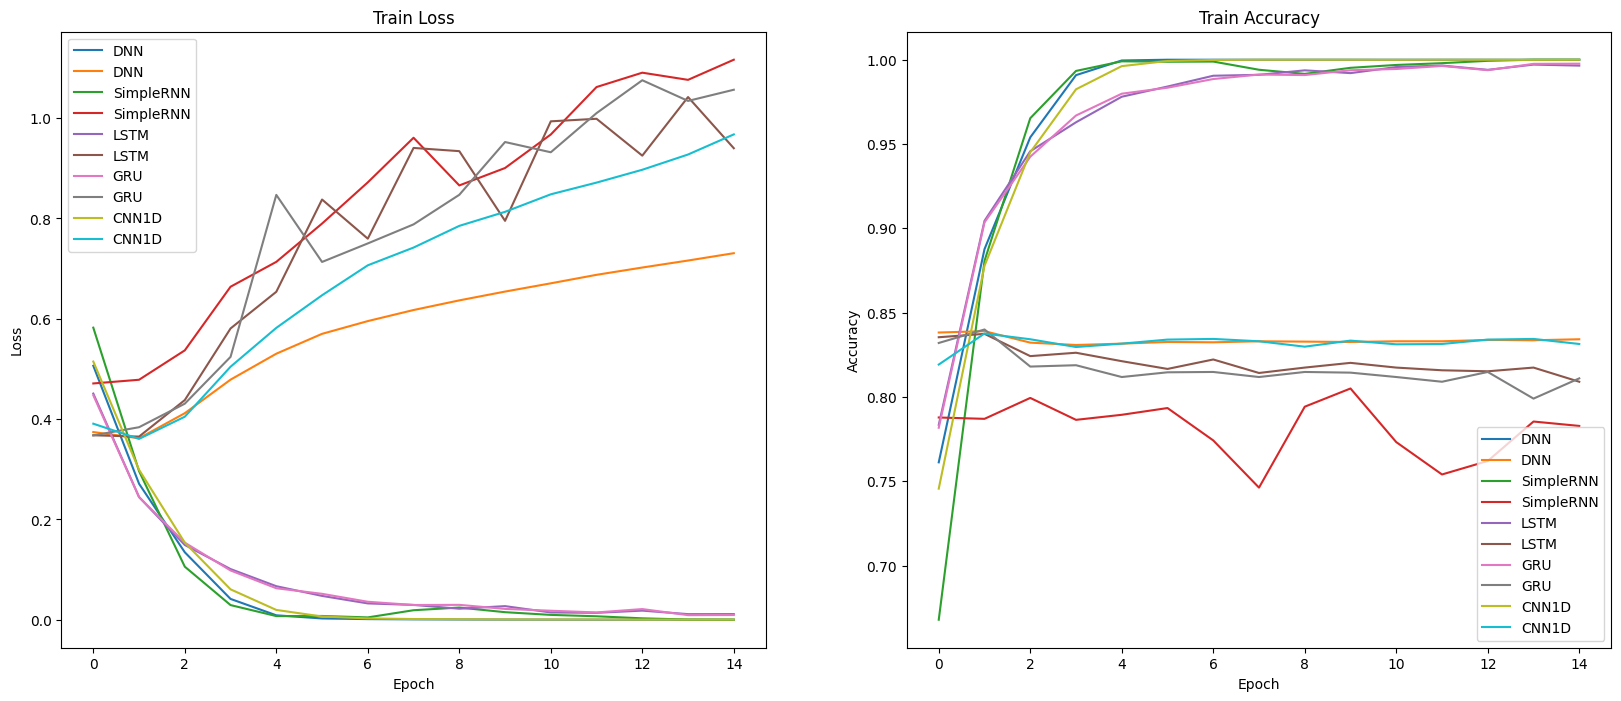

In [37]:
plot_model_comparision(histories, results, models)

In [27]:
df1=pd.DataFrame(model_name); df1.head()
df1.columns=['model_name']; df1.head()

,model_name
0,DNN
1,SimpleRNN
2,LSTM
3,GRU
4,CNN1D


In [28]:
#col=['model_name','loss','accuracy']
df2=pd.DataFrame(results); df2.head()
df2.columns=['loss','accuracy']; df2.head()

,loss,accuracy
0,0.756738,0.82372
1,1.111718,0.78656
2,0.995395,0.80352
3,1.097413,0.80392
4,1.009426,0.82580


In [29]:
df=pd.concat([df1,df2],axis=1); df.head()

,model_name,loss,accuracy
0,DNN,0.756738,0.82372
1,SimpleRNN,1.111718,0.78656
2,LSTM,0.995395,0.80352
3,GRU,1.097413,0.80392
4,CNN1D,1.009426,0.82580


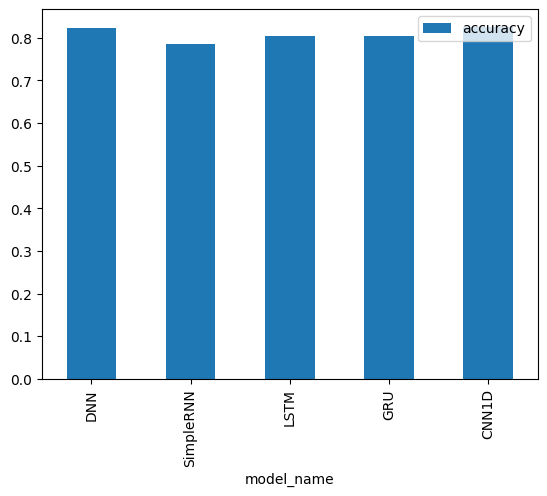

In [30]:
df.plot.bar(x='model_name',y='accuracy')

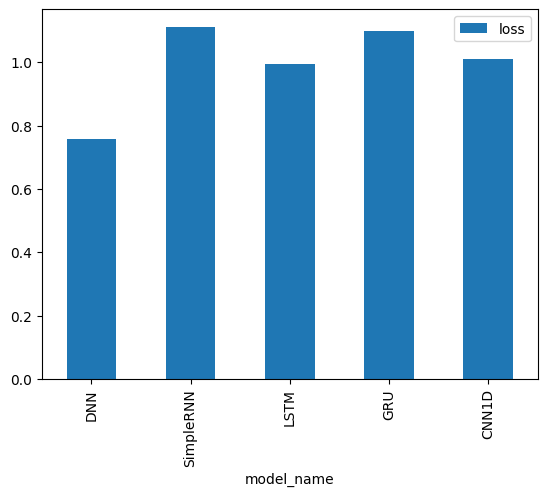

In [31]:
df.plot.bar(x='model_name',y='loss');